In [1]:
%load_ext autoreload
%autoreload 2

import models
import compute
import analysis

import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


Welcome to PyPhi!

If you use PyPhi in your research, please cite the paper:

  Mayner WGP, Marshall W, Albantakis L, Findlay G, Marchman R, Tononi G.
  (2018). PyPhi: A toolbox for integrated information theory.
  PLOS Computational Biology 14(7): e1006343.
  https://doi.org/10.1371/journal.pcbi.1006343

Documentation is available online (or with the built-in `help()` function):
  https://pyphi.readthedocs.io

To report issues, please use the issue tracker on the GitHub repository:
  https://github.com/wmayner/pyphi

For general discussion, you are welcome to join the pyphi-users group:
  https://groups.google.com/forum/#!forum/pyphi-users

To suppress this message, either:
  - Set `WELCOME_OFF: true` in your `pyphi_config.yml` file, or
  - Set the environment variable PYPHI_WELCOME_OFF to any value in your shell:
        export PYPHI_WELCOME_OFF='yes'



# Model

## Symmetric model

['000', '001', '010', '011', '111', '110', '101', '100']


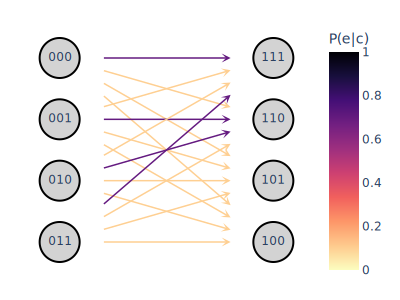

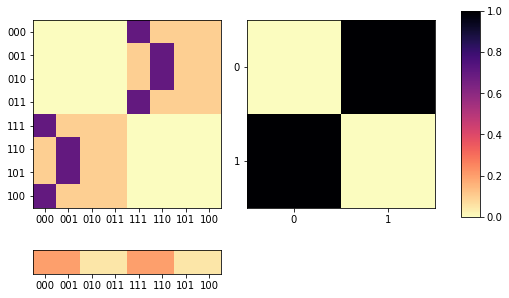

In [3]:
model_det = 0.6
model_deg = 0.5
n_states = 8
asymmetry = 0

colormap='magma_r'
micro_tpm, micro_states, (A_states, B_states) = models.create_micro_tpm(model_det, model_deg, n_states, asymmetry, state_labels='mirror')
print(micro_states)
macro_tpm, macro_states = models.create_macro_tpm()
fig = models.plot_tpm_graph(micro_tpm, micro_states, A_states, B_states, flip_direction = False,
                            width=400, height=300, renderer='svg', colormap=colormap,
                            node_color='lightgray', node_size=40, rho_arrow=0.6, arrowwidth=1.5);

fig = models.plot_tpm_matrices(micro_tpm, micro_states, macro_tpm, macro_states, colormap=colormap)

# fig.write_image(Path.cwd()/f'docs/figures/model_diagram_deg_{model_deg:.1f}_det_{model_det:.1f}_{colormap}.svg')
# plt.savefig(Path.cwd()/f'docs/figures/model_tpm_deg_{model_deg:.1f}_det_{model_det:.1f}_{colormap}.eps', dpi=200)

## Asymmetric model

[0, 1, 2, 3, 4, 5] [6, 7]


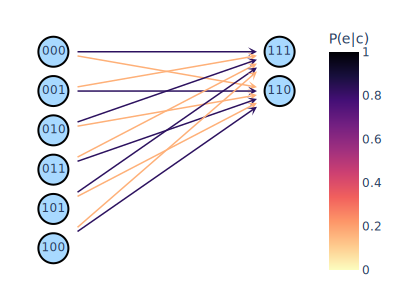

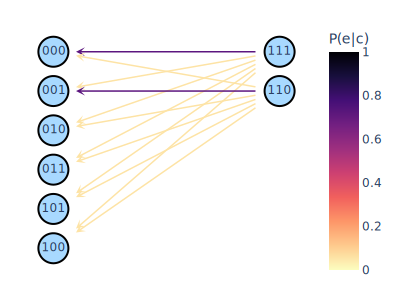

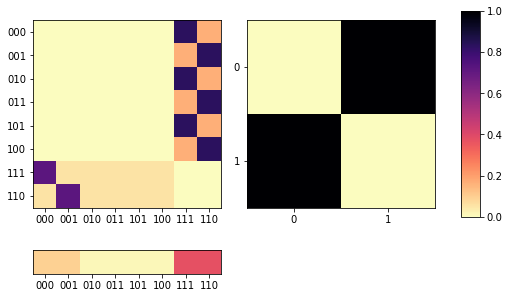

In [150]:
model_det = 2/3
model_deg = 0.7
model_deg = 0
n_states = 8
asymmetry = 0.8

colormap='magma_r'
micro_tpm, micro_states, (A_states, B_states) = models.create_micro_tpm(model_det, model_deg, n_states, asymmetry, state_labels='mirror')
macro_tpm, macro_states = models.create_macro_tpm()
fig = models.plot_tpm_graph(micro_tpm, micro_states, A_states, B_states, flip_direction = False,
                            width=400, height=300, renderer='svg', colormap=colormap);
fig = models.plot_tpm_graph(micro_tpm, micro_states, A_states, B_states, flip_direction = True,
                            width=400, height=300, renderer='svg', colormap=colormap);
models.plot_tpm_matrices(micro_tpm, micro_states, macro_tpm, macro_states, colormap=colormap)

## Degeneracy algorithm

/Users/atopos/Software/anaconda3/envs/on-being/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/atopos/Software/anaconda3/envs/on-being/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


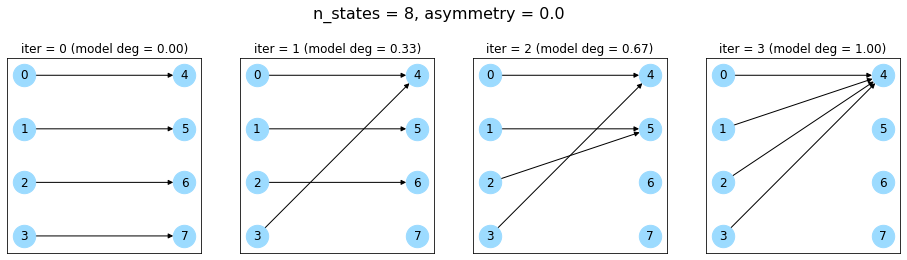

In [37]:
n_states = 8
asymmetry = 0
models.plot_algorithm(n_states, asymmetry)
plt.savefig(FIGURE_DIR/"FigS3_degeneracy_algorithm.eps")

/Users/atopos/Software/anaconda3/envs/on-being/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

/Users/atopos/Software/anaconda3/envs/on-being/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



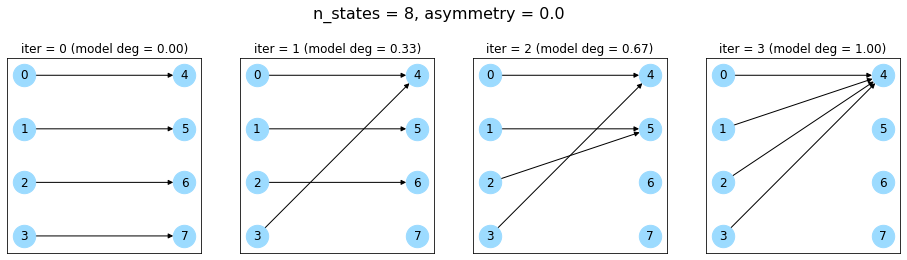

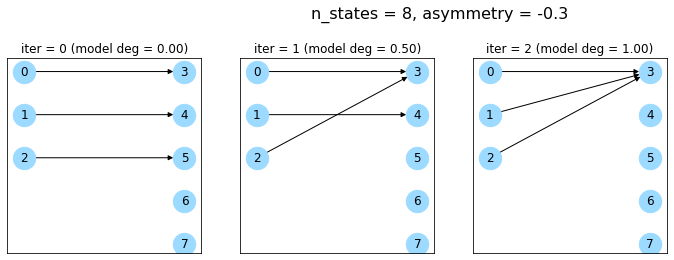

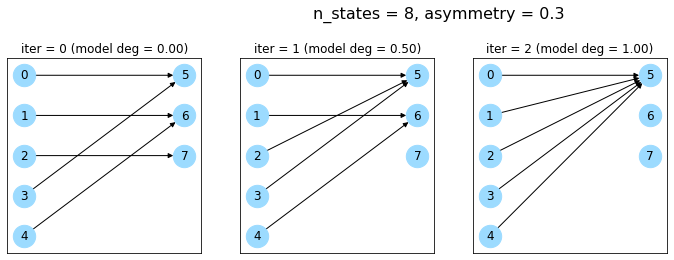

In [22]:
n_states = 8
asymmetry = 0
models.plot_algorithm(n_states, asymmetry)
asymmetry = -0.3
models.plot_algorithm(n_states, asymmetry)
asymmetry = 0.3
models.plot_algorithm(n_states, asymmetry)

# Analysis

## Toy system (8 states)

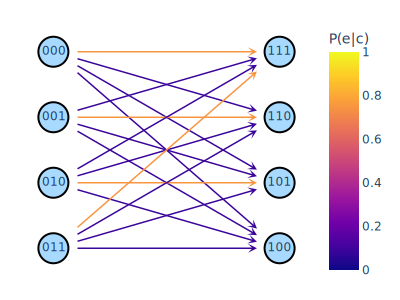

Parameters
Micro transition: (000) --> (100)
Macro transition: (0) --> (1)

Micro
Input distribution: 'stationary'
Macro
Input distribution: 'stationary' (all states)

All states (s): ['000', '001', '010', '011', '111', '110', '101', '100']
Cause purview states (c): ['000', '001', '010', '011', '111', '110', '101', '100']

Probabilities
P(s)                 = [0.20833333 0.125      0.125      0.04166667 0.20833333 0.125
 0.125      0.04166667] => [0.5 0.5]
P(c)                 = [0.20833333 0.125      0.125      0.04166667 0.20833333 0.125
 0.125      0.04166667] => [0.5 0.5]
P(not-c)             = [0.15789474 0.15789474 0.05263158 0.26315789 0.15789474 0.15789474
 0.05263158] => [1.]

P(e | c)             = 0.083 => 1.00
P(e | {c})           = 0.042 => 0.50
P(e | {not-c})       = 0.031 => 0.00
P(e | lewis not-c)   = 0.083 => 0.00

CS_Eells (PNS)       = 0.05 => 1.00
CS_Lewis (PN)        = 0.63 => 1.00
CS_Cheng (PS)        = 0.05 => 1.00
CS_Suppes            = 0.04 => 0.50
CS_Effect_In

In [84]:
which_input_dist = 'stationary' # 'maxent' or 'stationary'

model_det = 2/3
model_deg = 0.3

micro_transition = ['000', '100']
macro_transition = ['0', '1']
n_states = 8

micro_tpm, micro_states, (A_states, B_states) = models.create_micro_tpm(model_det, model_deg, n_states=n_states, asymmetry=0, state_labels='mirror')
macro_tpm, macro_states = models.create_macro_tpm()

models.plot_tpm_graph(micro_tpm, micro_states, A_states, B_states, width=400, height=300, renderer='svg');

micro_out = compute.calc_measures(micro_tpm, micro_states, micro_transition, which_input_dist)
macro_out = compute.calc_measures(macro_tpm, macro_states, macro_transition, which_input_dist)

analysis.print_measures_output(micro_out, macro_out)

# print()
# print('Average\n=======')
# micro_out = calc_measures_average_transition(micro_tpm, micro_states, which_cause_purview, which_input_dist, A_states=A_states)
# for stat, value in micro_out.items():
#     print(f"{stat} : {value:.2f}")

## Paper system (16 states)

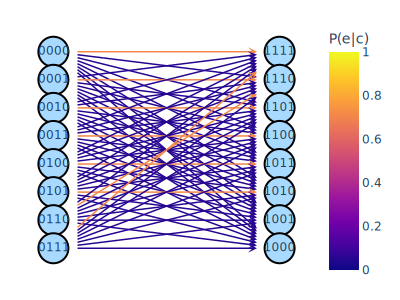

##########
STATIONARY
##########
Parameters
Micro transition: (0000) --> (1100)
Macro transition: (0) --> (1)

Micro
Input distribution: 'stationary'
Macro
Input distribution: 'stationary'


Probabilities
P(s)                 = ['0.10', '0.10', '0.06', '0.06', '0.06', '0.06', '0.02', '0.02', '0.10', '0.10', '0.06', '0.06', '0.06', '0.06', '0.02', '0.02'] => [0.5 0.5]
States(s)            = ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1111', '1110', '1101', '1100', '1011', '1010', '1001', '1000'] => ['0', '1']

P(not-c)             = ['0.12', '0.07', '0.07', '0.07', '0.07', '0.02', '0.02', '0.12', '0.12', '0.07', '0.07', '0.07', '0.07', '0.02', '0.02'] => [1.]
Not-c States(s)      = ['0010', '1001', '1101', '0110', '1111', '1010', '0101', '1000', '0100', '1011', '1100', '0111', '1110', '0001', '0011'] => ['1']

P(e | c)             = 0.0417 => 1.00
P(e | {c})           = 0.0625 => 0.50
P(e | {not-c})       = 0.0649 => 0.00

CS_Eells (PNS)       = -0.023 => 1.00
CS_L

In [189]:
state_labels='mirror'

model_det = 2/3
model_deg = 0.3

micro_transition = ['0000', '1100']
# micro_transition = ['0000', '1111']

macro_transition = ['0', '1']
n_states = 16

micro_tpm, micro_states, (A_states, B_states) = models.create_micro_tpm(model_det, model_deg, n_states=n_states, asymmetry=0, state_labels=state_labels)
macro_tpm, macro_states = models.create_macro_tpm()

models.plot_tpm_graph(micro_tpm, micro_states, A_states, B_states, width=400, height=300, renderer='svg');

which_input_dist = 'stationary' # 'maxent' or 'stationary'

for which_input_dist in ['stationary', 'maxent', 'perturb']:
    print('##########')
    print(which_input_dist.upper())
    print('##########')
    micro_out = compute.calc_measures(micro_tpm, micro_states, micro_transition, which_input_dist)
    macro_out = compute.calc_measures(macro_tpm, macro_states, macro_transition, which_input_dist)

    analysis.print_measures_output(micro_out, macro_out)
    print()

# print()
# print('Average\n=======')
# micro_out = calc_measures_average_transition(micro_tpm, micro_states, which_cause_purview, which_input_dist, A_states=A_states)
# for stat, value in micro_out.items():
#     print(f"{stat} : {value:.2f}")

# [0000, 0001, 0010, 0011, 0100, 0101, 0110, 0111, 1111, 1110, 1101, 1100, 1011, 1010, 1001, 1000

## Testing different transitions

In [192]:
n_states = 16
state_labels = 'mirror'

which_input_dist = 'maxent'

micro_transition_main = ['0000', '1111']
micro_transition_nonmain = ['0000', '1100'] # nicer results in general
micro_transition_nonmain2 = ['0010', '1111'] # nicer results for Lewis CPW, but counterintuitive
micro_transition_nonmain3 = ['0000', '1110']

macro_transition = ['0', '1']

all_results = {}

# SINGLE TRANSITIONS
print('SYMMETRIC MODEL - SINGLE TRANSITION ANALYSIS')

for micro_transition, transition_type in zip([micro_transition_main, micro_transition_nonmain, micro_transition_nonmain2, micro_transition_nonmain3],
                            ['main', 'nonmain', 'nonmain2', 'nonmain3']):
    for input_dist in ['maxent', 'perturb', 'stationary']:
    
        results = analysis.run_analysis(n_states, 'single', which_input_dist=input_dist, 
                                        micro_transition=micro_transition, macro_transition=macro_transition,
                                        state_labels=state_labels, asymmetry=0)

        all_results[input_dist + '_single_' + transition_type] = results


SYMMETRIC MODEL - SINGLE TRANSITION ANALYSIS


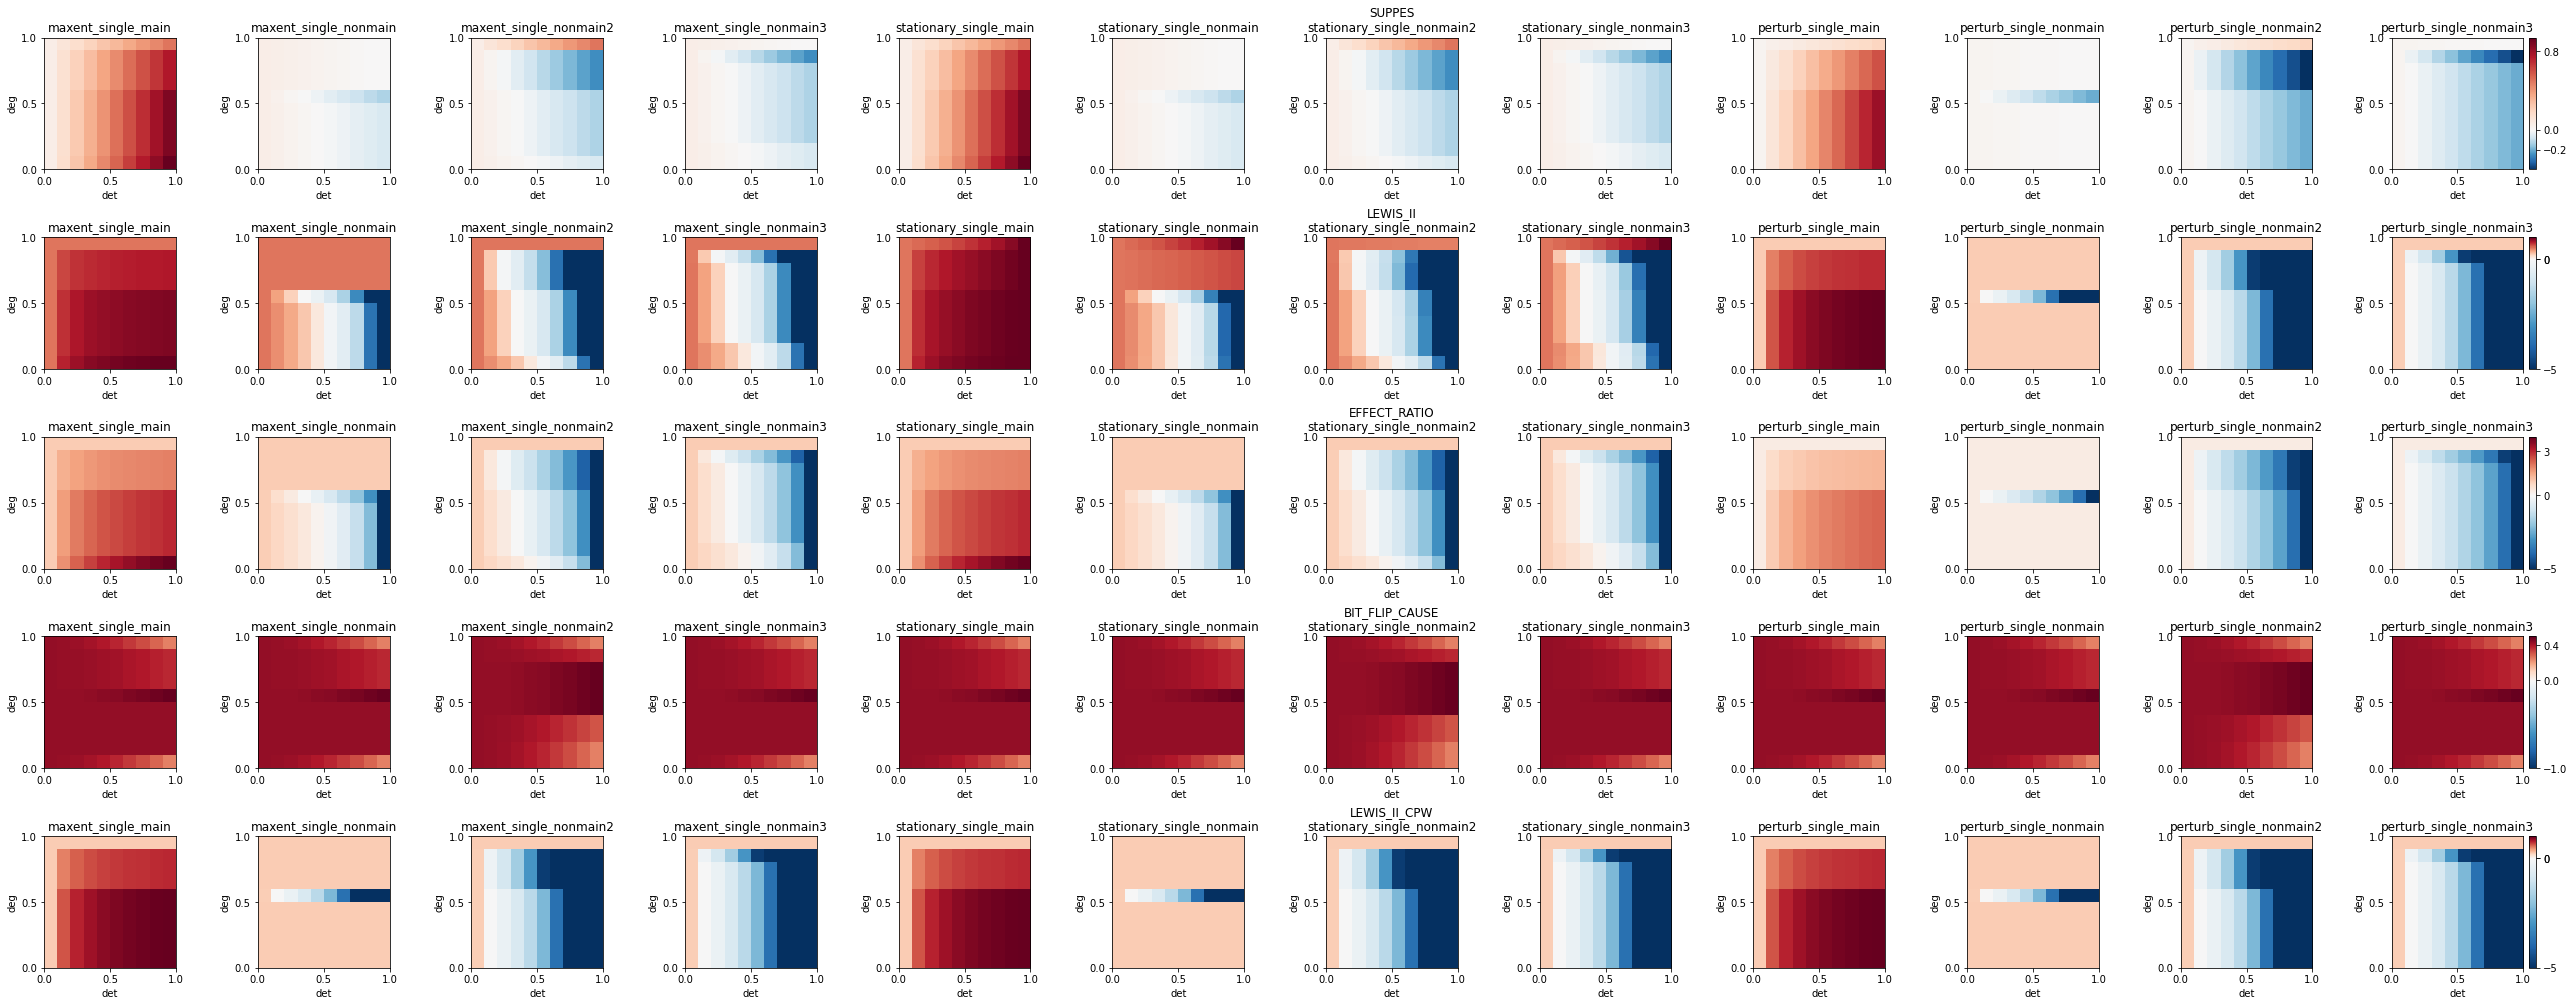

In [193]:
which_measures = ['suppes', 'lewis_II', 'effect_ratio', 'bit_flip_cause', 'lewis_II_cpw']

which_results = ['maxent_single_main', 'maxent_single_nonmain', 'maxent_single_nonmain2', 'maxent_single_nonmain3'] + \
                ['stationary_single_main', 'stationary_single_nonmain', 'stationary_single_nonmain2', 'stationary_single_nonmain3'] + \
                ['perturb_single_main', 'perturb_single_nonmain', 'perturb_single_nonmain2', 'perturb_single_nonmain3']

fig, axs = analysis.plot_analysis_by_result(all_results, which_results=which_results, which_measures=which_measures,
                                            scale='micro',transpose=True, no_titles=False, no_labels=False, colormap='RdBu_r')
# plt.subplots_adjust(wspace=0.12, hspace=0.15)
# plt.savefig(Path.cwd()/f'docs/figures/fig3_causal_measures_RdBu.eps')

# Multiple transitions across model parameters

## Run analysis

In [46]:
n_states = 16
state_labels = 'mirror'

micro_transition_main = ['0000', '1111']
micro_transition_nonmain = ['0000', '1100']
micro_transition_nonmain2 = ['0010', '1111']
micro_transition_nonmain3 = ['0000', '1110']

micro_transition_nonmain = micro_transition_nonmain3 # CHOICE OF SECONDARY TRANSITION

macro_transition = ['0', '1']

all_results = {}

In [47]:
# SINGLE TRANSITIONS
print('SYMMETRIC MODEL - SINGLE TRANSITION ANALYSIS')
for input_dist, micro_transition, transition_type in zip(['maxent', 'maxent', 'perturb', 'perturb', 'stationary', 'stationary'],
                                                        [micro_transition_main, micro_transition_nonmain, micro_transition_main, micro_transition_nonmain, micro_transition_main, micro_transition_nonmain],
                                                        ['main', 'nonmain', 'main', 'nonmain', 'main', 'nonmain']):
    
    results = analysis.run_analysis(n_states, 'single', which_input_dist=input_dist, 
                                    micro_transition=micro_transition, macro_transition=macro_transition,
                                    state_labels=state_labels, asymmetry=0)

    all_results[input_dist + '_single_' + transition_type] = results
    

SYMMETRIC MODEL - SINGLE TRANSITION ANALYSIS


In [48]:
# AVERAGE OVER TRANSITIONS
print('SYMMETRIC MODEL - AVERAGE OVER TRANSITIONS ANALYSIS')

for input_dist in ['maxent', 'stationary', 'perturb']:
    for averaging_dist in ['maxent', 'stationary']:
        print(input_dist, averaging_dist)
        results = analysis.run_analysis(n_states, 'average', which_input_dist=input_dist,
                                           which_averaging_dist=averaging_dist,
                                           state_labels=state_labels, asymmetry=0)

        all_results[input_dist + '_' + averaging_dist + '_average'] = results

SYMMETRIC MODEL - AVERAGE OVER TRANSITIONS ANALYSIS
maxent maxent
maxent stationary
stationary maxent
stationary stationary
perturb maxent
perturb stationary


In [49]:
# ASYMMETRIC MODEL (AVERAGE OVER TRANSITIONS)
print('ASSYMETRIC MODEL - AVERAGE OVER TRANSITIONS ANALYSIS')

for asymmetry in [0.7]:
    for input_dist, averaging_dist in zip(['maxent', 'stationary'], ['maxent', 'stationary']):
        print(input_dist, averaging_dist)
        results = analysis.run_analysis(n_states, 'average', which_input_dist=input_dist,
                                           which_averaging_dist=averaging_dist,
                                           state_labels=state_labels, asymmetry=asymmetry)

        all_results[f"{input_dist}_{averaging_dist}_average_asy_{asymmetry:.1f}"] = results

ASSYMETRIC MODEL - AVERAGE OVER TRANSITIONS ANALYSIS
maxent maxent
stationary stationary


## Save and Load analysis

In [204]:
with open("causal_emergence_results_24_01_2022.pkl", "wb") as f:
    pickle.dump(all_results, f)

In [6]:
n_states = 16
state_labels = 'mirror'

with open("causal_emergence_results_24_01_2022.pkl", "rb") as f:
    all_results = pickle.load(f)

In [7]:
all_results.keys()

dict_keys(['maxent_single_main', 'maxent_single_nonmain', 'perturb_single_main', 'perturb_single_nonmain', 'stationary_single_main', 'stationary_single_nonmain', 'maxent_maxent_average', 'maxent_stationary_average', 'stationary_maxent_average', 'stationary_stationary_average', 'perturb_maxent_average', 'perturb_stationary_average'])

## Visualize results

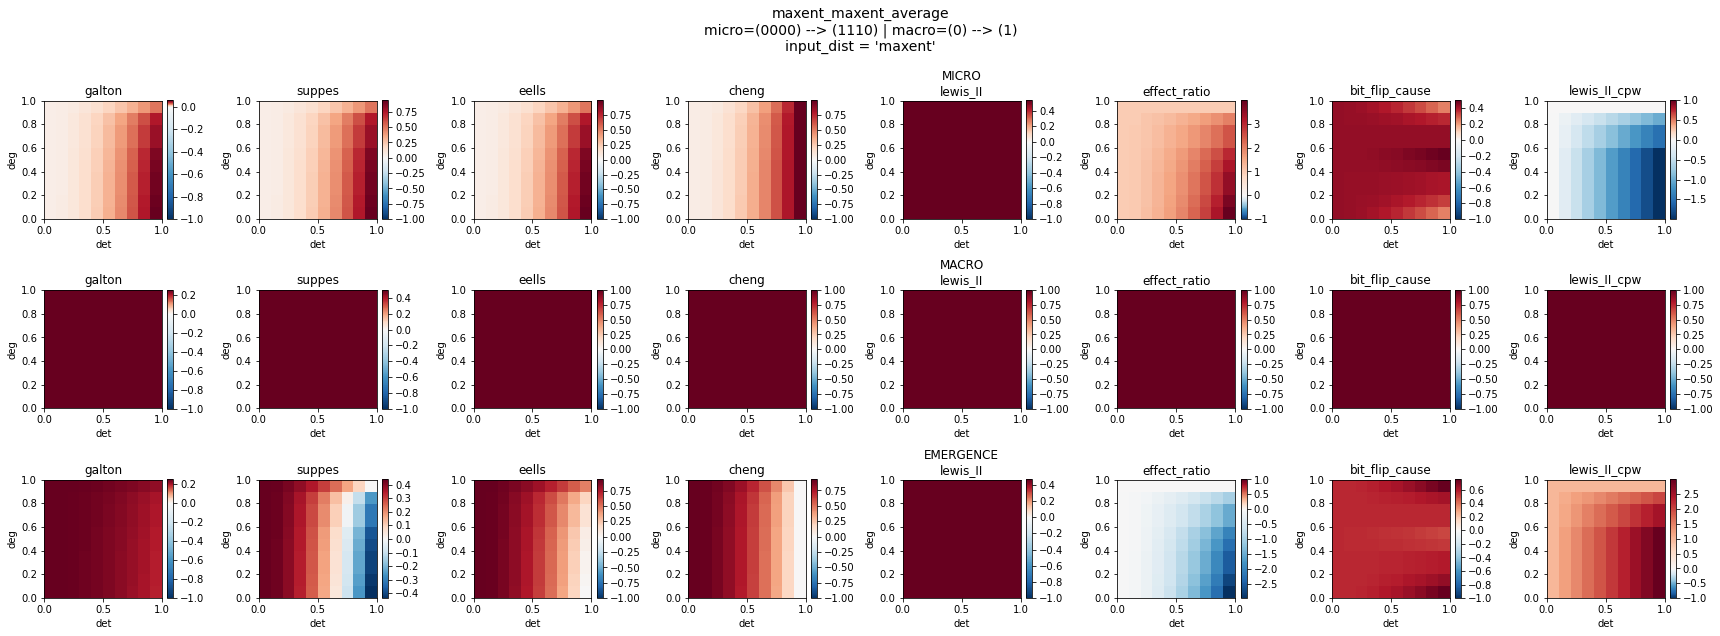

In [161]:
measures = ['galton', 'suppes', 'eells', 'cheng', 'lewis_II', 'effect_ratio', 'bit_flip_cause', 'lewis_II_cpw']

which_result = 'maxent_maxent_average'
result = all_results[which_result]

fig, axs = analysis.plot_analysis_by_scales(result, which_scales=['micro', 'macro', 'emergence'], which_measures=measures)
s1 = f"{which_result}\nmicro=({micro_transition[0]}) --> ({micro_transition[1]}) | macro=({macro_transition[0]}) --> ({macro_transition[1]})"
s2 = f"input_dist = '{which_input_dist}'"
suptitle = "\n".join([s1, s2])
fig.suptitle(suptitle, fontsize=14);
plt.subplots_adjust(top=0.85)
# plt.savefig(Path.cwd()/f'figures/causal_primitives_inputdist_{which_input_dist}_single_main.png', dpi=200)

In [ ]:
measures = ['sufficiency', 'necessity', 'point_det_coef', 'point_deg_coef']

# SINGLE TRANSITION
fig, axs = analysis.plot_analysis_01_02(results_01, which_scales=['micro', 'macro', 'emergence'], which_measures=measures)
s1 = f"Single transition\nmicro=({micro_transition[0]}) --> ({micro_transition[1]}) | macro=({macro_transition[0]}) --> ({macro_transition[1]})"
s2 = f"cause_purview = '{which_cause_purview}', input_dist = '{which_input_dist}'"
suptitle = "\n".join([s1, s2])
fig.suptitle(suptitle, fontsize=14);
plt.subplots_adjust(top=0.85)
# plt.savefig(Path.cwd()/f'figures/causal_primitives_inputdist_{which_input_dist}_single_main.png', dpi=200)

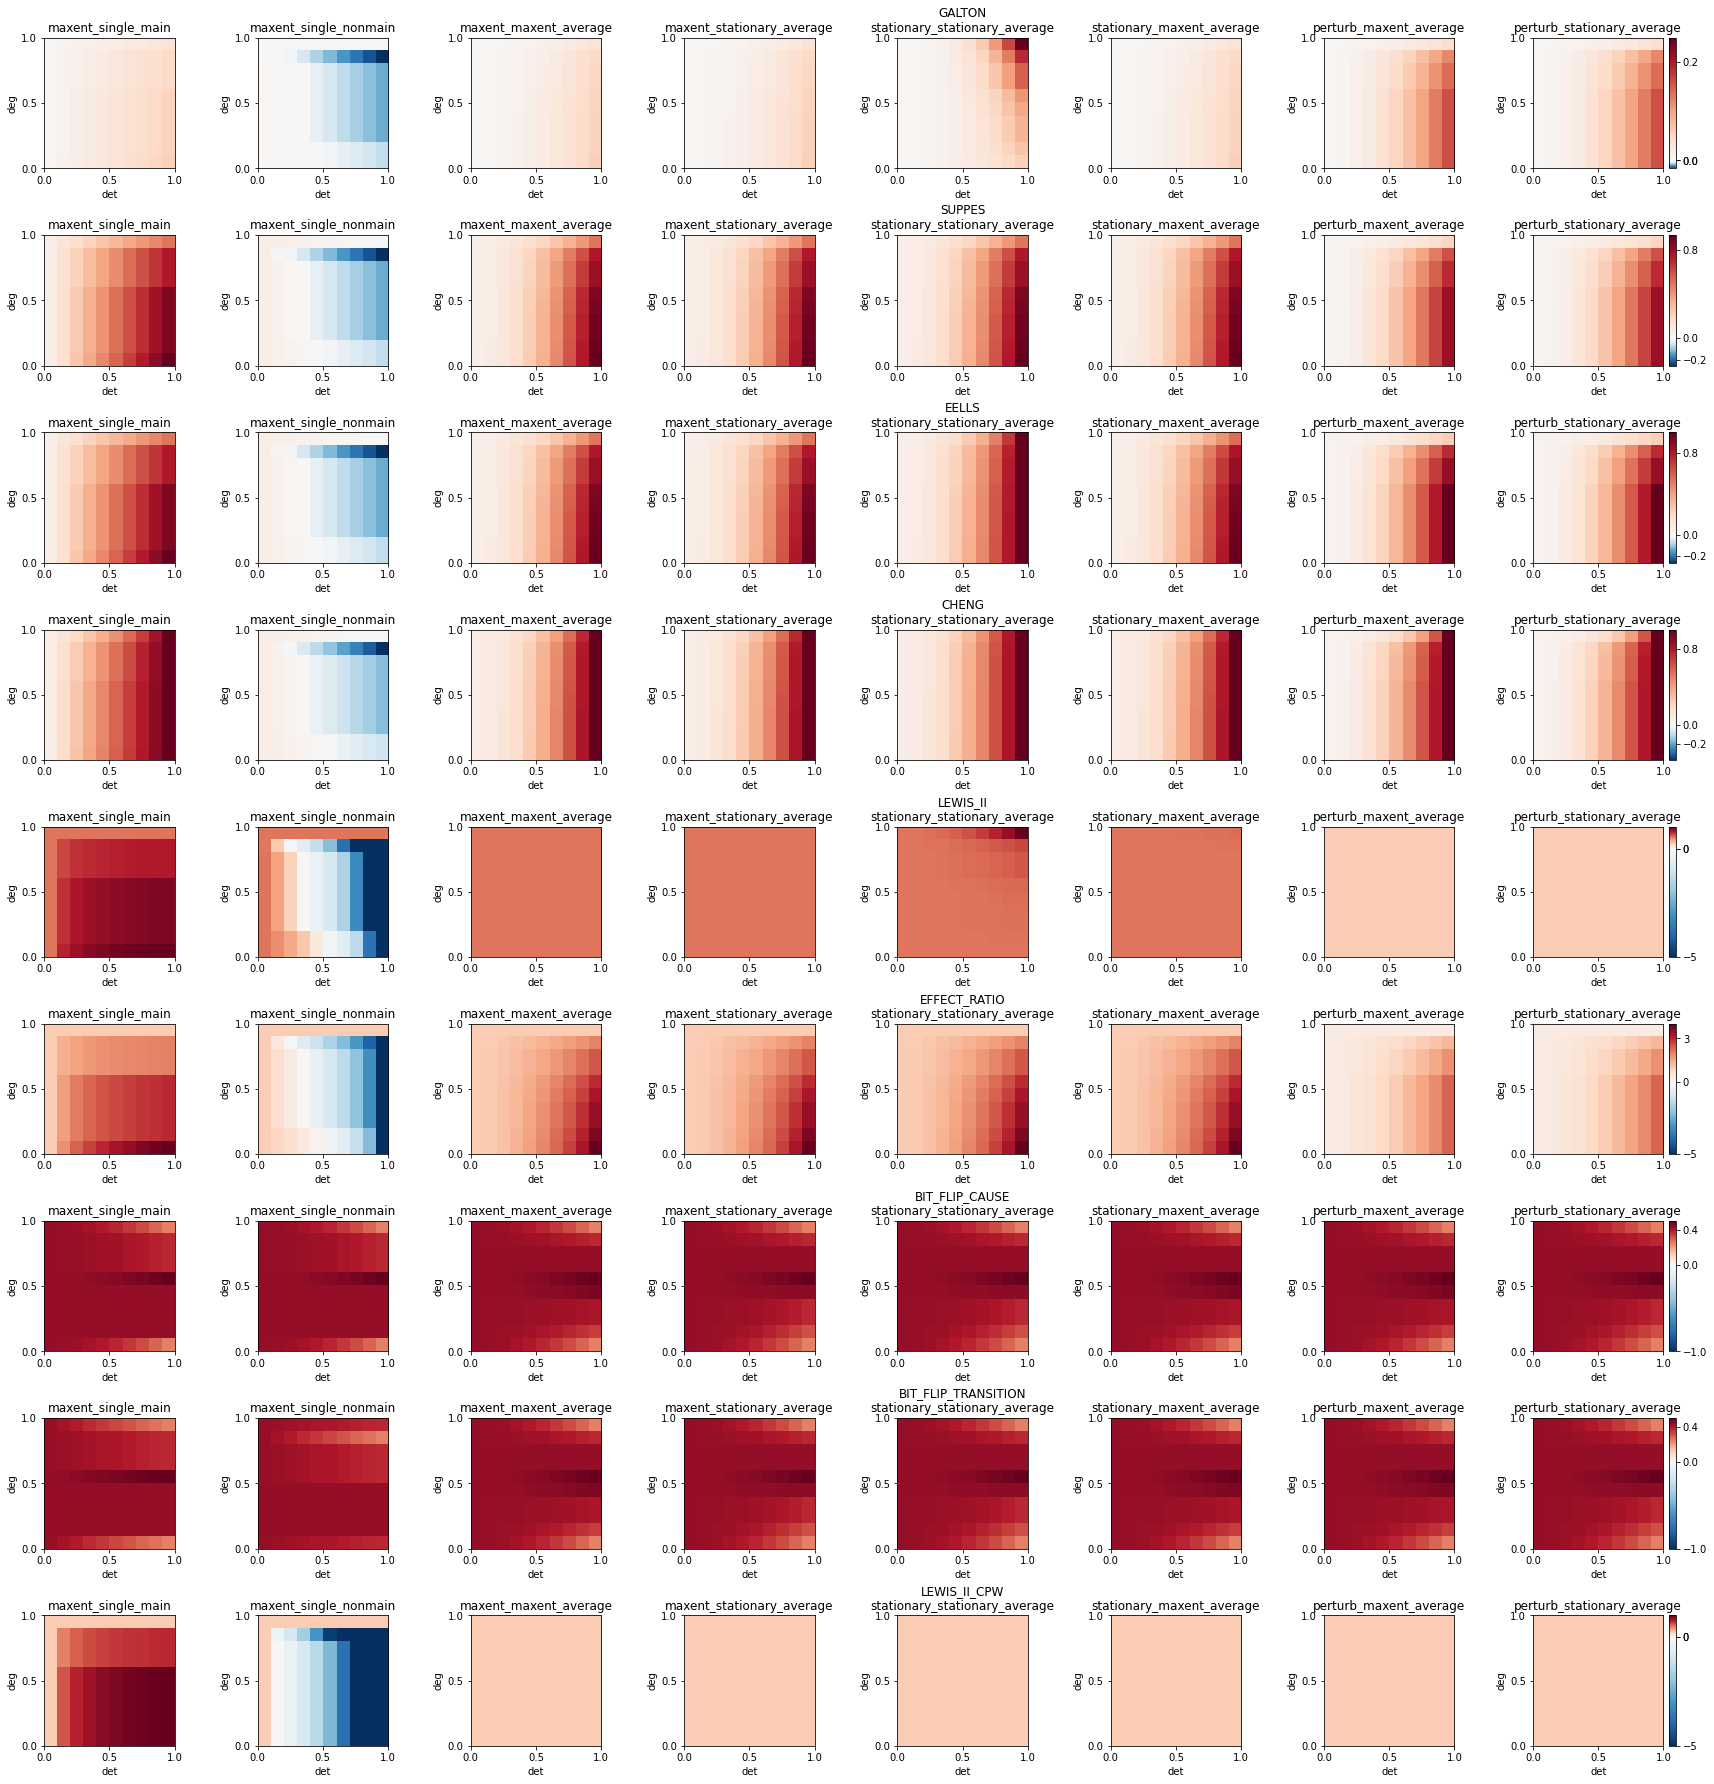

In [199]:
which_measures = ['galton', 'suppes', 'eells', 'cheng', 'lewis_II', 'effect_ratio', 'bit_flip_cause', 'bit_flip_transition', 'lewis_II_cpw']

which_results = ['maxent_single_main', 'maxent_single_nonmain', 'maxent_maxent_average',  'maxent_stationary_average', 'stationary_stationary_average', 'stationary_maxent_average', 'perturb_maxent_average', 'perturb_stationary_average']

fig, axs = analysis.plot_analysis_by_result(all_results, which_results=which_results, which_measures=which_measures,
                                            scale='micro',transpose=True, no_titles=False, no_labels=False, colormap='RdBu_r')
# plt.subplots_adjust(wspace=0.12, hspace=0.15)
# plt.savefig(Path.cwd()/f'docs/figures/fig3_causal_measures_RdBu.eps')

# Paper Figures

In [31]:
FIGURE_DIR = Path.cwd()/"docs/figures"

## Figure S1

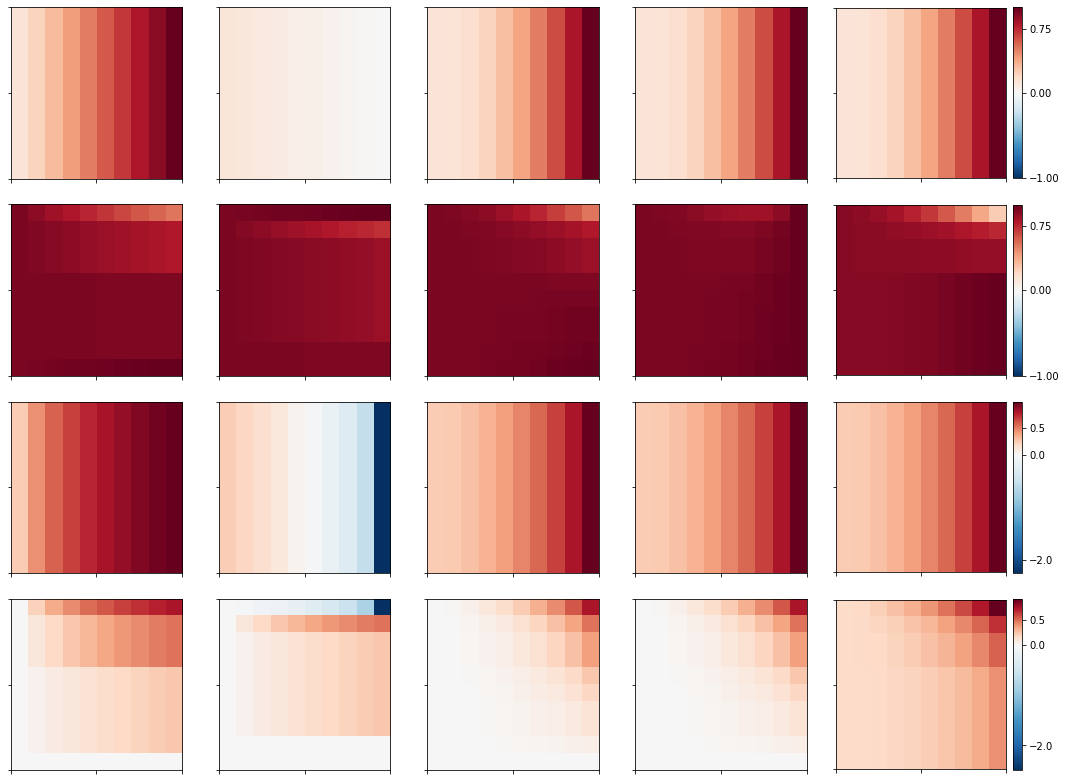

In [36]:
which_measures = ['sufficiency', 'necessity', 'point_det_coef', 'point_deg_coef']
which_results = ['maxent_single_main', 'maxent_single_nonmain', 'maxent_maxent_average', 'stationary_stationary_average', 'perturb_maxent_average']

fig, axs = analysis.plot_analysis_by_result(all_results, which_results=which_results, which_measures=which_measures,
                                            scale='micro',transpose=True, no_titles=True, no_labels=True, colormap='RdBu_r')
plt.subplots_adjust(wspace=0.12, hspace=0.15)
plt.savefig(FIGURE_DIR/"figS1_causal_measures.eps")

## Figure 3

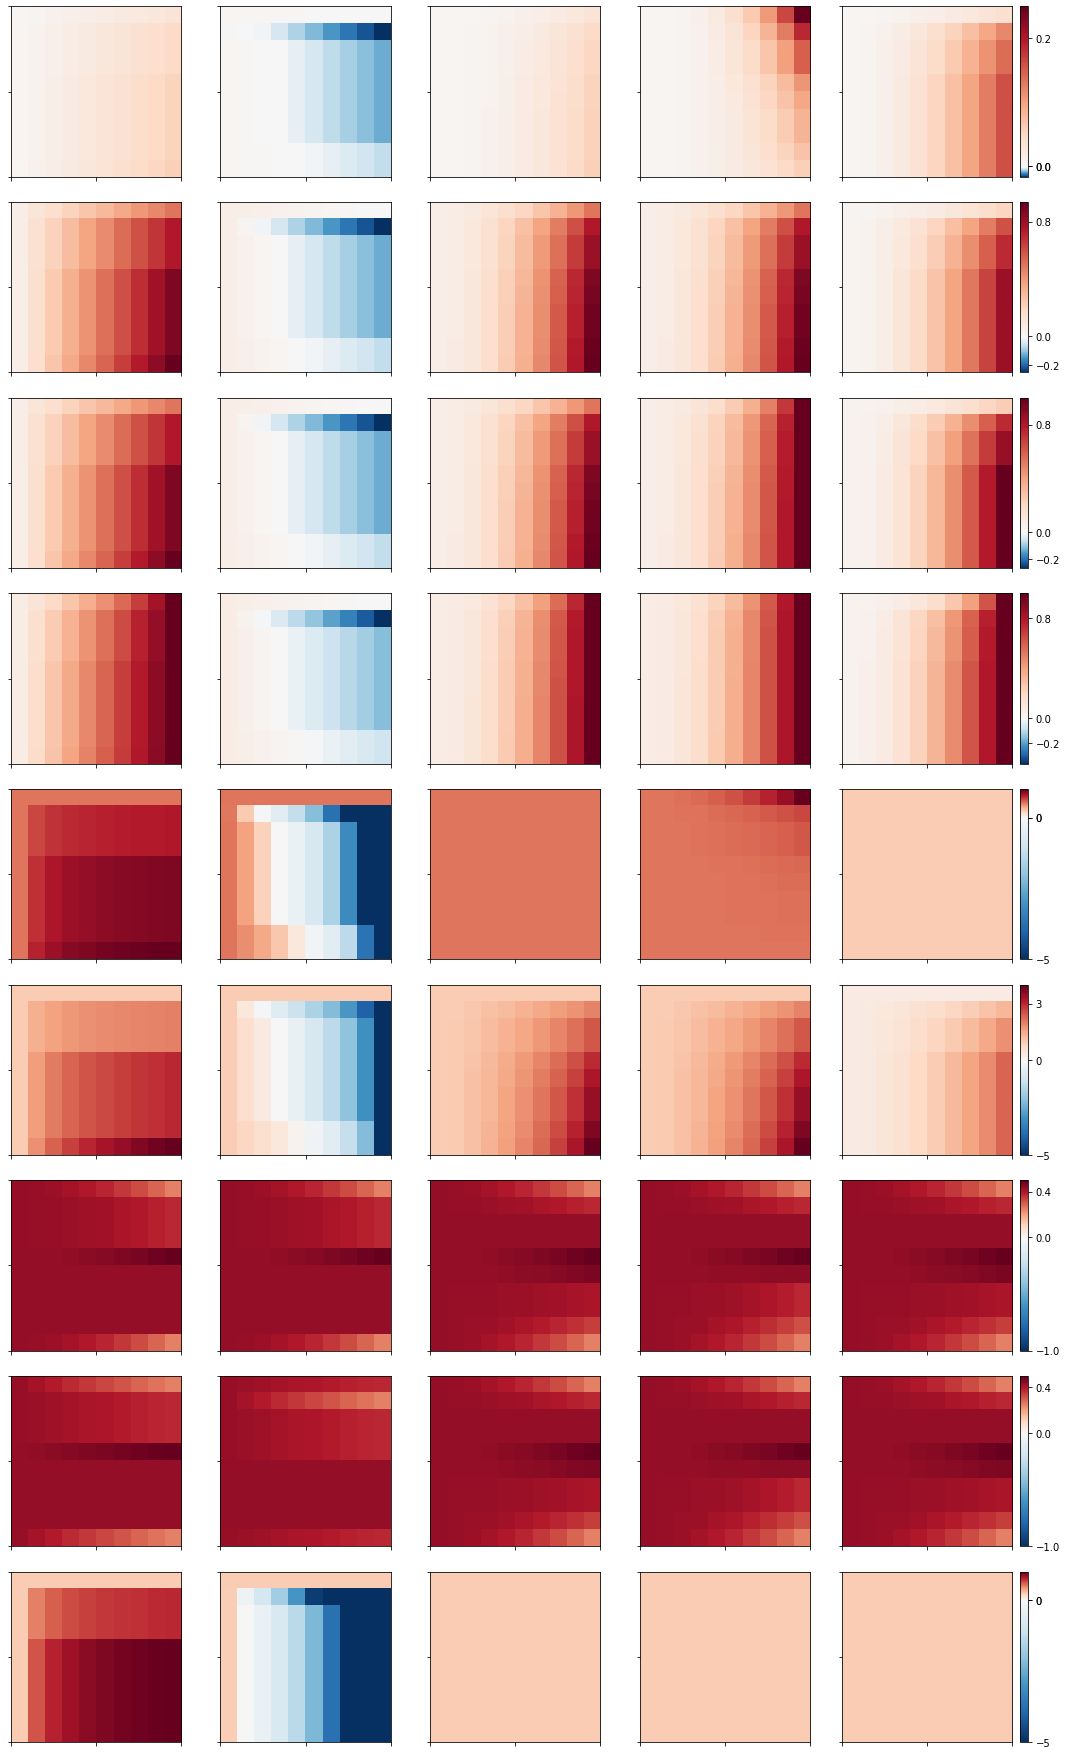

In [200]:
which_measures = ['galton', 'suppes', 'eells', 'cheng', 'lewis_II', 'effect_ratio', 'bit_flip_cause', 'bit_flip_transition', 'lewis_II_cpw']

which_results = ['maxent_single_main', 'maxent_single_nonmain', 'maxent_maxent_average', 'stationary_stationary_average', 'perturb_maxent_average']

fig, axs = analysis.plot_analysis_by_result(all_results, which_results=which_results, which_measures=which_measures,
                                            scale='micro',transpose=True, no_titles=True, no_labels=True, colormap='RdBu_r')
plt.subplots_adjust(wspace=0.12, hspace=0.15)
plt.savefig(FIGURE_DIR/"fig3_causal_measures_RdBu_cpwmean.eps")

## Figure 4

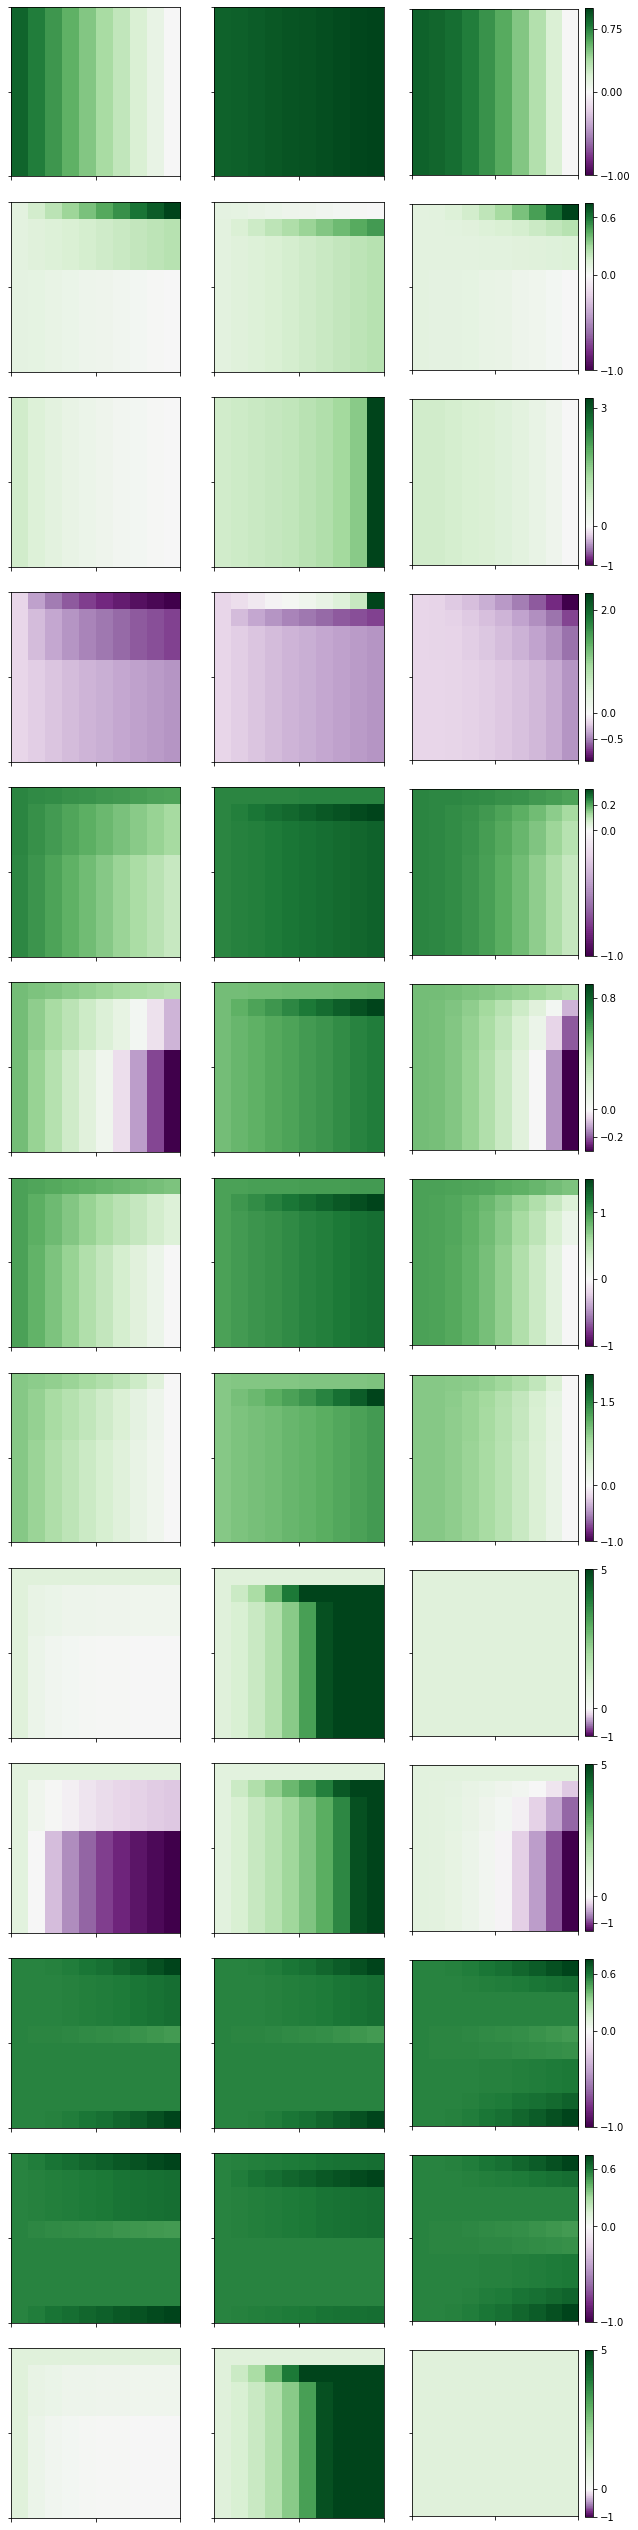

In [201]:
which_measures = ['sufficiency', 'necessity', 'point_det_coef', 'point_deg_coef'] + ['galton', 'suppes', 'eells', 'cheng', 'lewis_II', 'effect_ratio', 'bit_flip_cause', 'bit_flip_transition', 'lewis_II_cpw']

which_results = ['perturb_single_main', 'perturb_single_nonmain', 'perturb_maxent_average']

fig, axs = analysis.plot_analysis_by_result(all_results, which_results=which_results, which_measures=which_measures,
                                            scale='emergence',transpose=True, no_titles=True, no_labels=True, colormap='PRGn')
plt.subplots_adjust(wspace=0.12, hspace=0.15)
plt.savefig(Path.cwd()/f'docs/figures/fig4_causal_emergence_PRGn_cpwmean.eps')

## Figure S2

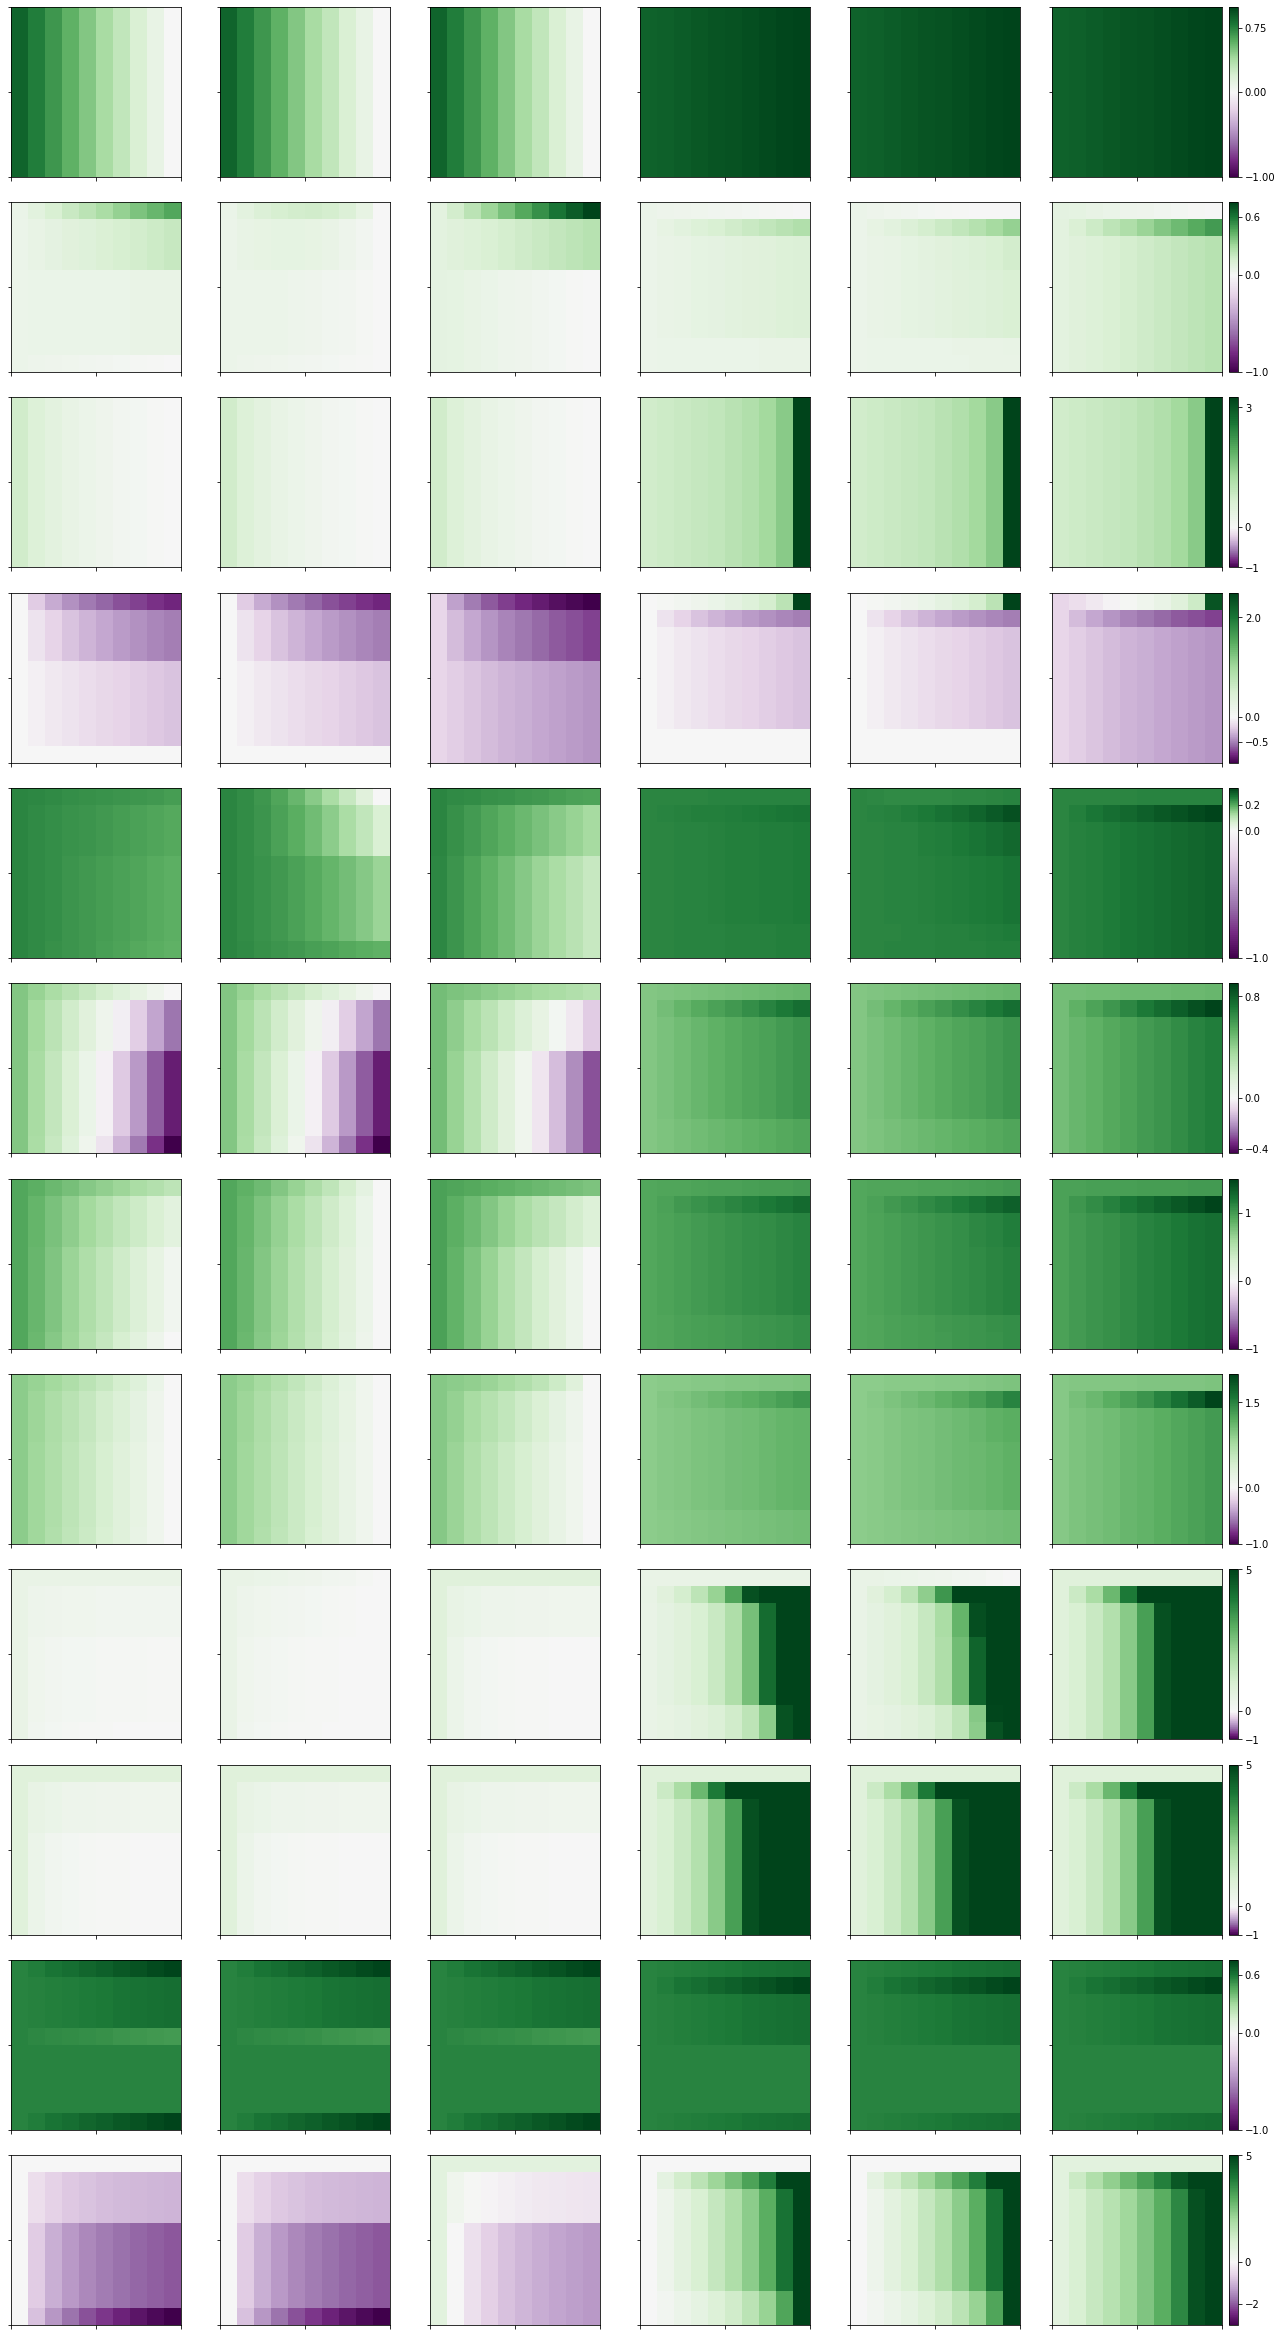

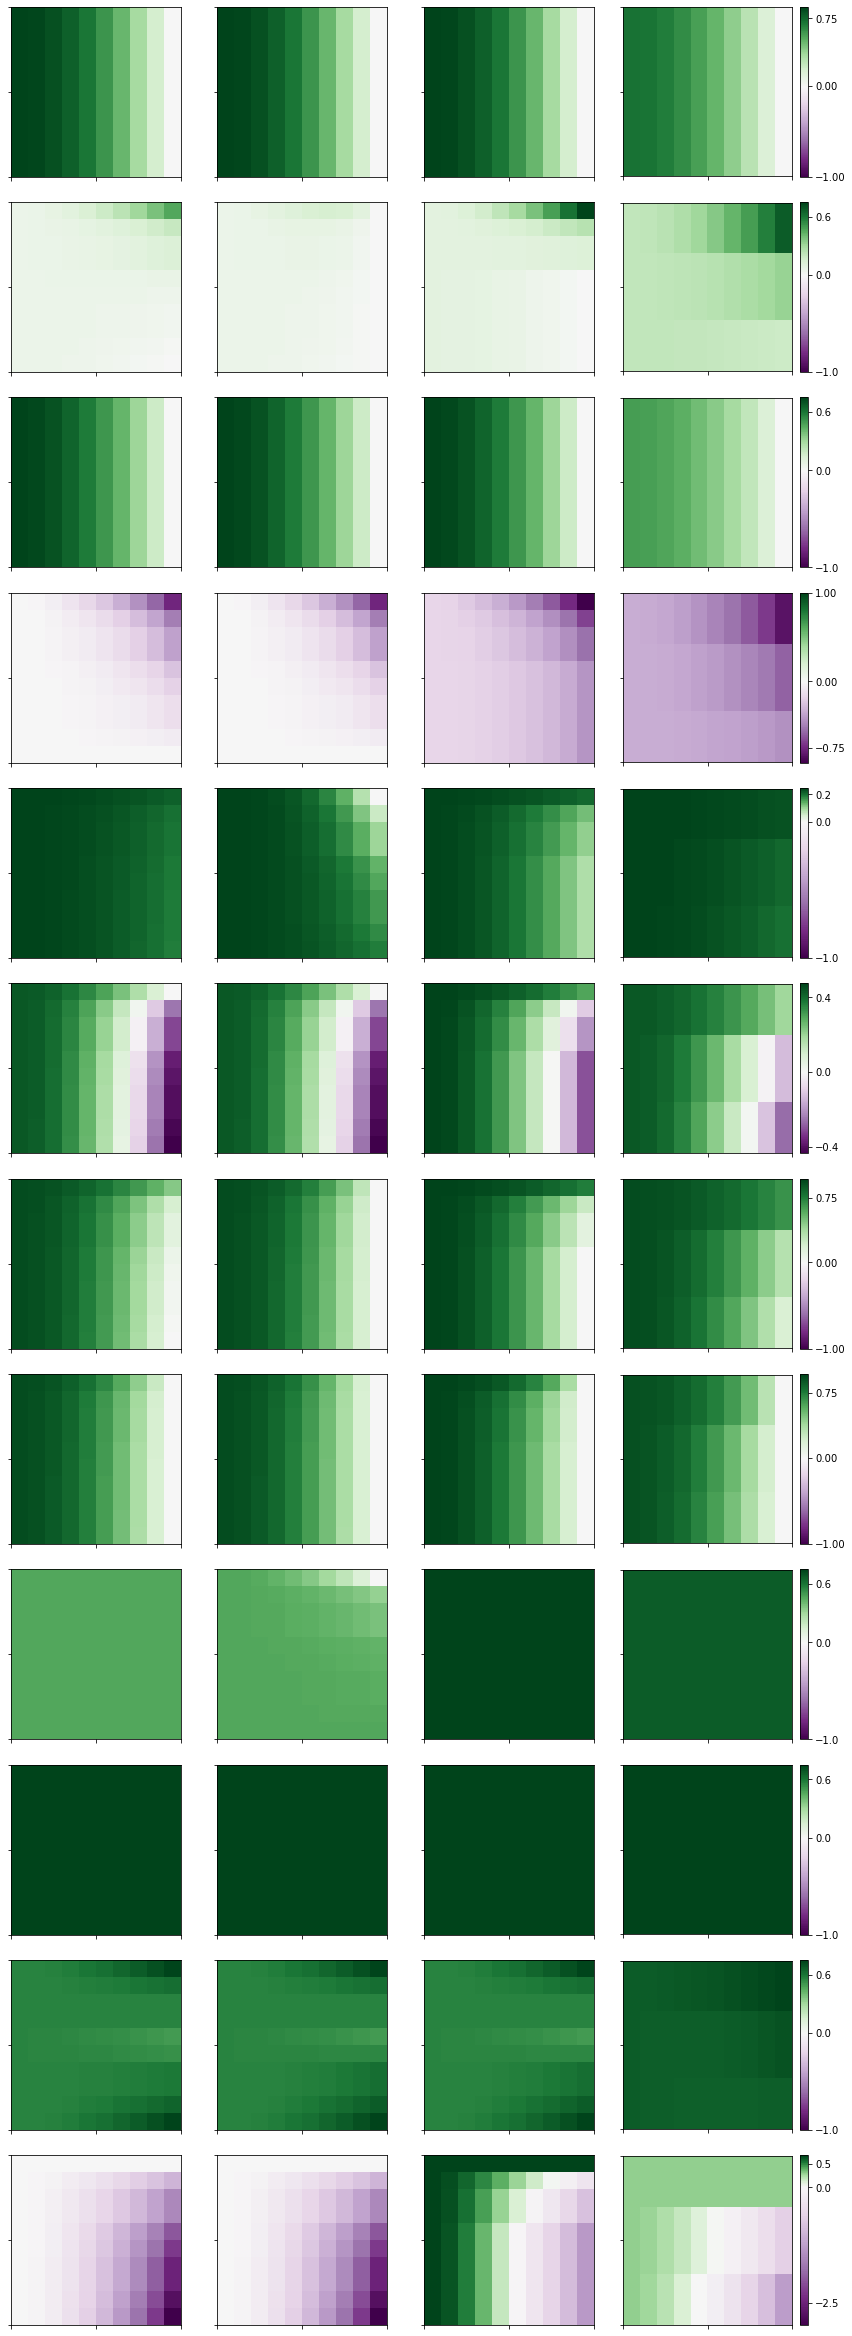

In [43]:
which_measures = ['sufficiency', 'necessity', 'point_det_coef', 'point_deg_coef'] + ['galton', 'suppes', 'eells', 'cheng', 'lewis_II', 'lewis_II_cpw', 'bit_flip_transition', 'effect_ratio']

which_results = ['maxent_single_main', 'stationary_single_main', 'perturb_single_main', 'maxent_single_nonmain', 'stationary_single_nonmain', 'perturb_single_nonmain']

fig, axs = analysis.plot_analysis_by_result(all_results, which_results=which_results, which_measures=which_measures,
                                            scale='emergence',transpose=True, no_titles=True, no_labels=True, colormap='PRGn')
plt.subplots_adjust(wspace=0.12, hspace=0.15)
plt.savefig(FIGURE_DIR/"figS2_causal_emergence_PRGn_1.eps")

which_measures = ['sufficiency', 'necessity', 'point_det_coef', 'point_deg_coef'] + ['galton', 'suppes', 'eells', 'cheng', 'lewis_II', 'lewis_II_cpw', 'bit_flip_transition', 'effect_ratio']

which_results = ['maxent_maxent_average', 'stationary_stationary_average', 'perturb_stationary_average', 'maxent_maxent_average_asy_0.7']

fig, axs = analysis.plot_analysis_by_result(all_results, which_results=which_results, which_measures=which_measures,
                                            scale='emergence',transpose=True, no_titles=True, no_labels=True, colormap='PRGn')
plt.subplots_adjust(wspace=0.12, hspace=0.15)
plt.savefig(FIGURE_DIR/"figS2_causal_emergence_PRGn_2.eps")

## Figure 5

PERTURB_STATIONARY_AVERAGE
VALUE:  [0.24499996 0.24456183 0.24326295 0.24110333 0.23808296 0.23420185
 0.22946    0.2238574  0.21739405 0.21006996]
0.368611664903707 1.0
VALUE:  [0.47499982 0.47280915 0.46631476 0.45551665 0.44041481 0.42100926
 0.39729998 0.36928698 0.33697026 0.30034983]
-0.6283176525380831 1.0
VALUE:  [0.96874978 0.96601144 0.95789345 0.94439581 0.92551852 0.90126157
 0.87162498 0.83660873 0.79621283 0.75043728]
0.0019990004513870106 1.0
VALUE:  [0.96551695 0.96155925 0.94851692 0.92381058 0.88362402 0.82207441
 0.72960987 0.5896411  0.37062556 0.00436275]
0.0019410680351009298 1.0
VALUE:  [0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]
0.9999999999999997 1.0
VALUE:  [0.67807191 0.67807191 0.67807191 0.67807191 0.67807191 0.67807191
 0.67807191 0.67807191 0.67807191 0.67807191]
-1.0 0.5154381384393776
VALUE:  [0.56250019 0.56484734 0.57180561 0.58337502 0.59955556 0.62034722
 0.64575002 0.67576395 0.710389   0.74962519]
0.6671666665416042 1.0
VALUE:  [0.75 0.75 

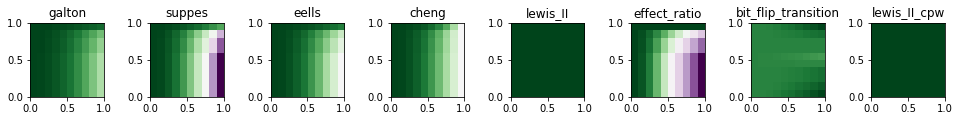

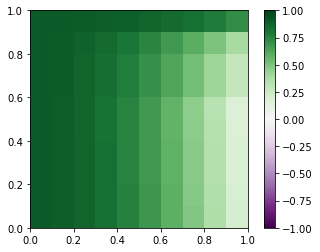

In [33]:
colormap = 'PRGn'

result = 'maxent_stationary_average'
result = 'perturb_maxent_average'
result = 'perturb_stationary_average'

scale = 'emergence'

# for result in ['maxent_average', 'maxent_stationary_average', 'stationary_average']:
print(result.upper())
plt.figure(figsize=(20,2))

B = []

measures = ['galton', 'suppes', 'eells', 'cheng', 'lewis_II', 'effect_ratio', 'bit_flip_transition','lewis_II_cpw']
# measures = ['sufficiency', 'necessity', 'point_det_coef', 'point_deg_coef'] + ['galton', 'suppes', 'eells', 'cheng', 'lewis_II', 'effect_ratio', 'bit_flip_transition','lewis_II_cpw']


for n, measure in enumerate(measures):
    A = all_results[result][measure][scale]
    print("VALUE: ", A[0])
    norm = np.max(np.abs(A))
    A = A / norm

    ax = plt.subplot(1, 12, n+1)

    vmin, vmax = np.min(A), np.max(A)
    print(vmin, vmax)
    if vmin > -1e-18:
        vmin = -1
    if vmax < 1e-18:
        vmax = 1
        

    divnorm = mpl.colors.TwoSlopeNorm(vmin=vmin, vcenter=0., vmax=vmax)


    im = plt.imshow(A, extent=(0, 1, 0, 1), norm=divnorm, cmap=colormap)

    plt.title(measure)

    B.append(A)

plt.tight_layout()

B = np.array(B)
C = np.var(B, axis=0)
C = np.std(B, axis=0)
B = np.mean(B, axis=0)

vmin, vmax = np.min(B), np.max(B)
print("super average".upper())
print(vmin, vmax, np.mean(B))
if vmin > -1e-18:
    vmin = -1
if vmax < 1e-18:
    vmin = 1
    
divnorm = mpl.colors.TwoSlopeNorm(vmin=-1, vcenter=0., vmax=1)

plt.figure()
im = plt.imshow(B, extent=(0, 1, 0, 1), norm=divnorm, cmap=colormap)

# plt.figure()
# im = plt.imshow(C, extent=(0, 1, 0, 1), norm=divnorm, cmap=colormap)

plt.colorbar()
plt.savefig(FIGURE_DIR/'fig5_causal_emergence_super_average_normalized.eps')
